# Spatial Data Analysis with Python

### MSc in SEE 

Lucas Kruitwagen

2021-11-17 11:00 & 16:00

Lucas.Kruitwagen@smithschool.ox.ac.uk

@lucaskruitwagen

https://github.com/Lkruitwagen

#### About me

- DPhil Geography and the Environment
- Research Associate UK CGFI, Sustainable Finance Group
- Frontier Development Lab, Team Lead
- Cofounder www.oxfordeo.com

Recent work:

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/solar_pv_twitter.jpeg" alt="drawing" style="display:inline" width="800"></img>

<sub>[[1](https://www.nature.com/articles/s41586-021-03957-7)]:Kruitwagen, L., Story, K.T., Friedrich, J., Byers, L., Skillman, S., & Hepburn, C. (2021) _Nature_: **598** 604: 610</sub>

# Motivation

What is spatial analysis? Why do we care?

Spatial dependence has been observed across the social sciences: anthropology, demography, political science, sociology, public health, economics.

If geography is the "why and how of where" we need a suite of methods that allows us to answer "why and how" questions empirically.

This module will introduce the tools and methods for empirical geography, and indeed the spatial methods used through all the social sciences.

We're going to do this by working through examples using real data.

# Introduction: Neighbours, Diffusion, and Spatial Autocorrelation

## Why is are spatial methods different than other statistical methods?



Spatially-dependent processes can be observed across all of the social sciences and many physical sciences. 

Consider, for example, studies of the impacts of climate change on species distibutions; disease or virus diffusion; or social aspects of economic decision-making.

| Species Distribution<sup>2</sup> | Public Health<sup>3</sup> | Econometric<sup>4</sup> |
| -------------------- | ------------- | ----------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/species_map.png" alt="drawing" style="display:inline" width="800"></img>     | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/covid_19_outbreaks.gif" alt="drawing" style="display:inline" width="800"></img>          | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/rooftop_pv_census.png" alt="drawing" style="display:inline" width="800"></img>       |

We seek to statistically model *spatial processes*, so we can isolate the mechanisms that give rise to our dependent variable of interest, and design interventions which optimally intervene to create better outcomes.

<sub>[[2](https://nca2014.globalchange.gov/downloads)]:Pryor, S.C., Scavia, D., Downer, C.W., & Gagden, M. (2014) Chapter 18: Midwest in _2014 National Climate Assessment_: </sub>

<sub>[[3](https://thefern.org/2020/04/mapping-covid-19-in-meat-and-food-processing-plants/)]:Douglas, L. (2020) Mapping Covid-19 outbreaks in the food system, _Food & Environment Reporting Network_</sub>

<sub>[[4](https://www.nature.com/articles/s41893-018-0204-z)]:Sunter, D.A., Castellanos, S., & Kammen, D.M. (2019) Disparities in rooftop photovoltaics deployment in the United States by race and ethnicity, _Nature Sustainability_: **2** 71: 76</sub>

### The main challenge: Galton's problem (1888)

Data sampled from a spatial process are not independent - they all have a relationship with each other via the mechanism of spatial proximity. So when making statistical estimates about the population, the analyst cannot deduce whether an external independent variable or the relationship between samples is responsible for the observed dependent variable.

Spatial statistical methods must adjust for *diffusion* - that is, the likelihood of neighbouring units to adopt (usually) similar behaviour.



For example, what is more likely to cause me to put solar PV panels on my roof? Is it the fact that I have a lot of sun where I live? Or is it because my neighbour installed PV panels on their roof?

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/correlation.png" alt="drawing" style="display:inline" width="800"></img>

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/diffusion.png" alt="drawing" style="display:inline" width="800"></img>

In this specific example, in California in 2012, "an additional installation increases the probability of an adoption in the zip code by 0.78 percentage points."<sup>5</sup>

<sub>[[5](https://pubsonline.informs.org/doi/abs/10.1287/mksc.1120.0727?journalCode=mksc)]: Bollinger, B., & Gillingham, K. (2012) Peer Effects in the Diffusion of Solar Photovoltaic Panels, _Marketing Science_: **31**(6)</sub>

With X as the independent variable solar irradiance, and Y as the dependent variable, my likelihood to install solar PV we have:

Correlation only case:  Y ~ f(X)

Correlation + Diffusion case:     Y ~ f(Y,X)

Y is now _endogenous_, we have an autocorrelated model.

### Spatial Autocorrelation

Spatial autocorrelation is different from temporal autocorrelation.

With temporal autocorrelation, our current dependent variable is correlated with a time-lagged copy of itself. 

Temporal autocorrelation: Y<sub>t</sub> ~ f(Y<sub>t-1</sub>, X)

However given the nature of time, this correlation is one-directional; my actions today cannot impact my actions yesterday.

With spatial autocorrelation, the diffusion effect is bi-directional; my choice of solar PV installation affects my neighbour's choice and vice-versa. They are also _simultaneous_, one not leading the other.

Spatial autocorrelation is easy to detect as a spatial clustering of data.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/spatial_autocorrelation.jpg" alt="drawing" style="display:inline" width="800"></img>

<sub>[[6](https://www.sciencedirect.com/science/article/pii/B9780124095489096809)]: Griffith, D.A., & Chun, Y. (2018) GIS and Spatial Statistics/Econometrics: An Overview in _Comprehensive Geographic Information Systems_, 1-26</sub>





In less common cases, spatial autocorrelation can also be negative.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/spatial_autocorrelation_2.png" alt="drawing" style="display:inline" width="800"></img>

<sub>[[7](https://link.springer.com/article/10.1007/s00248-020-01608-4)]: Boraks, A., Plunkett, G.M., Doro, T.M., et al. (2020) _Microbial Ecology_, **81**: 874-883</sub>

If we are developing a spatial model, we want to test for spatial autocorrelation not in the dependent variable, as the independent variable might be spatially continuous, but in the error residuals, ϵ.

Y = f(X) + ϵ

## Who are my neighbours?

In spatial statistics, neighbours are data who have a strong spatial relationship. As we begin to specify a spatial model, we need to know which of our data are neighbours to test for the presence of diffusion.

E.g. in a chessboard 'gridworld' we can describe several spatial relationships which might constitute neighbours.


<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/chessboard.png" alt="drawing" style="display:inline" width="800"></img>

Neighbour relationships can be weighted, can be any arbitrary function. A common example is a gaussian kernel (i.e. the shape of the normal distribution) distributed by distance. Also common is the inverse square distance.


<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/gauss.png" alt="drawing" style="display:inline" width="800"></img>

Neighbours need not be drawn in a 'gridworld'. 

E.g. which london boroughs are neighbours to Hammersmith and Fulham?


<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/london_boroughs.png" alt="drawing" style="display:inline" width="800"></img>

Neighbour relationships need not even be geospatial. These methods are useful for any spatially-arranged data, even data where the spatial arrangement is figurative or semantic, rather than literal.

E.g.  here's how the US Senate voted in the 26th congress.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/senate.png" alt="drawing" style="display:inline" width="800"></img>

"ten of the forty-two senators in this analysis exhibit spatially autocorrelated NOMINATE scores with their neighboring senators"

<sub>[[8](https://doi.org/10.1017/CBO9781139051293.005)]: Darmofal, D. (2015) _Spatial Analysis for the Social Sciences_, Cambridge University Press, with Finocchario, C.J. per Note 4</sub>


"*everything is related to everything else, but near things are more related than distant things.*" - Tobler's First Law of Geography


<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/london_adjacency.png" alt="drawing" style="display:inline" width="800"></img>

We can represent this spatial adjacency as a graph... welcome to complexity! 

# Contents

*   [Introduction: Neighbours, Diffusion, and Spatial Autocorrelation](#Introduction-Neighbours-Diffusion-and-Spatial-Autocorrelation)
*   [Tools and Setup](#tools)
*   [Key Lesson 0: Map Projections](#Key-Lesson-0--Map-Projections)
*   [Key Lesson 1: Modifiable Areal Unit Problem](#Key-Lesson-1--Modifiable-Areal-Unit-Problem)
*   [Key Lesson 2: The Political Boundary Problem](#Key-Lesson-2--The-Political-Boundary-Problem)
*   [Key Lesson 3: The Scale Problem](#Key-Lesson-3--The-Scale-Problem)
*   [Key Lesson 4: Returning to Spatial Autocorrelation](#Key-Lesson-4--Returning-to-Spatial-Autocorrelation)
*   [Tutorial 0: Vector data basics](#Tutorial-0--Vector-data-basics)
*   [Tutorial 1: Reading, Analysis, and Writing Vector Data](#Tutorial-1--Reading--Analysis--and-Writing-Vector-Data)
*   [Tutorial 2: Reading and Writing Raster Data](#Tutorial-2--Reading-and-Writing-Raster-Data)
*   [Tutorial 3: Spatial Sampling](#Tutorial-3-Spatial-Joins)
*   [Tutorial 4: Spatial Regression](#Tutorial-4--Spatial-Regression)

# Tools
<a id='tools'></a>

### QGIS/ArcGIS

Geospatial analysis tools which have full-featured user interfaces. Available across Linux, MacOS, Windows. Good for visualisation and for beginners with little/no programming knowledge.

### Google Earth Engine

Cloud-based geospatial analytics engine, with in-browser UI and javascript editor, and Python API. Great for visualisation and prototyping. Asynchronous cloud computation is challenging for beginners.

### Matlab/R/Stata

Statistics software / programming languages. R in particular is open source, with good spatial analysis library support.

### Python

"The second-best language for everything." Incredible geospatial data science libraries, second only to R for spatial statistics libraries, but otherwise far more versitile and scalable to big data. The new lingua franca.

# Python: Setup with Google Colab

What's Colab? https://colab.research.google.com/ is a [Jupyter notebook](https://jupyter.org/) hosted by Google. It's an interactive Python environment that allows us to easily prototype and share code. For deep learning I can also easily connect a small GPU to my notebook instance. Being in the Google ecosystem means I can easily connect to Google services like Drive.

What's so great about Juypter? Code is executed in 'cells' which means that the data stays in memory and I don't need to run a script from the start every time I change a small thing. It also allows me to conveniently write documentation in `Markdown`. 

```Data Science Protip: Don't only code in Jupyter! You will get lost in your code and long notebooks are unreadable by others. Good practise is to prototype in Jupyter and then move your code to stable modules version-controlled using Git.```

#### Installation

Let's get started. To begin we install our requirements, a combination of linux packages installed with `apt install` and Python packages installed using `pip install`. The `!` indicates we want to use 'command-line magic'. Google Colab doesn't give us direct access to the Terminal, so we use command-line magic whenever we want to execute commandline tasks.

In [ ]:
# Installations
!apt install gdal-bin python-gdal python3-gdal 
!pip install rasterio
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

In [ ]:
!pip install ipyleaflet
!pip install geojson
!pip install mapclassify
!pip install geopy
!pip install pygeos

In [ ]:
!pip install pysal
!pip install spreg

What did we just install? We used `apt` to install C packages and their Python bindings. With spatial analysis, Python sometimes uses underlying C libraries so we need to go beyond the usual Python-only libraries.

[GDAL](https://gdal.org/) is the main open-source C library that underlies most spatial analysis. It's maintained by [The Open Source Geospatial Foundation](https://www.osgeo.org/). [RTree](https://toblerity.org/rtree/) is a spatial indexing method that allows us to efficiently query geometric data with other geometries.

We then also installed some Python packages using `pip`. Colab environments come with many Python packages pre-installed, but we've needed to add our main geospatial data packages. We'll use [GeoPandas](https://geopandas.org/) - the geospatial add-on for Python's data analysis library [Pandas](https://pandas.pydata.org/) for our _vector_ data manipulation, and [RasterIO](https://rasterio.readthedocs.io/en/latest/index.html) for our _raster_ data manipulation. We've also imported [NumPy](https://numpy.org/), Python's comprehensive mathematical library, [matplotlib](https://matplotlib.org/), Python's plotting and visualisation library, and [Shapely's](https://shapely.readthedocs.io/en/stable/manual.html) `geometry` for geometric operations. We'll use [PyProj](https://pypi.org/project/pyproj/) for coordinate reprojections, and [PySAL](https://pysal.org/) and [SPReg](https://pysal.org/spreg/) for spatial regression analysis. [GeoJSON](https://geojson.org/) will provide us with the json specification for spatial vector data. We'll also install the [pygeos](https://pygeos.readthedocs.io/) backend for GeoPandas which will give us access to some advanced features.

We'll do some interactive mapping with [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/index.html).

(Advanced: You can also use a PyGEOS back-end with GeoPandas, although these two libraries are converging.)

In [ ]:
# Import packages to our Jupyter environment 
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import pysal as ps
import spreg
import matplotlib.pyplot as plt
import rasterio as rio
import rasterio.features
from shapely import geometry
from shapely.ops import transform
import pyproj
from ipyleaflet import Map, GeoData, basemaps, LayersControl
import geojson
from sklearn.metrics import mean_squared_error as mse
from geopy.distance import geodesic, great_circle
# need to enable third-party widgets to use ipyleaflet within Colab
from google.colab import output
output.enable_custom_widget_manager()

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


#### Get Data

Geospatial analysis uses a lot of data! The data for this tutorial has been made available at [/lk/data/path](). You'll need to copy this data to this notebook instance. There are two options for doing this.


In [ ]:
# Option 1: use gdown to grab the zipfile directly from my drive and then unzip it.
!pip install gdown
!gdown https://drive.google.com/uc?id=file_id

In [ ]:
# Option 2: Mount your own google drive as a filesystem and copy the files over 
# instructions here: https://webapps.stackexchange.com/questions/120362/how-to-copy-a-shared-folder-into-my-own-google-drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# set our root path that we'll use for file io in the tutorial
root = os.path.join('/content/drive/MyDrive/ssee_msc/spatial_methods/tutorial_data')

# Key Lesson 0: Map Projections



[Relevant XKCD: What your favourite map projection says about you](https://xkcd.com/977/)

The Earth is an oblate ("squashed") spheroid. We need to mathematically describe our position on this spheroid so we can measure where we are. 

But we also want to represent things in two dimensions for documents, screens, etc. 

What to do!?

So first let's understand the shape of our planet. The Earth's semi-major axis (equitorial radius) is 6,378 km, and the semi-minor axis (polar radius) is 6,257 km. The mathematical shape and the gravitational distribution of the planet is defined by standards set by the United States National Geospatial-Intelligence Agency. The uncertainty in a set of lat-lon WGS84 coordinates is expected to be only several centimetres, dominated by the tectonic movements of landmass rather than measurement uncertainty.

| Earth Gravitational Model | Exaggerated Difference between spherical, oblate, and actual coordinates |
| ------------------------- | ---------------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/grace.gif" alt="drawing" style="display:inline" height="400" width="400"></img> <br><sub>https://nasaviz.gsfc.nasa.gov/11234</sub>  | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/wgs84.png" alt="drawing" style="display:inline" height="400"></img> |     


We can *project* our 3D planet into a 2D plane choosing to preserve certain dimensions as best we can. We can image rolling and stretching its surface onto a 2D plane or a 3D shape with a 2D surface like a cylinder.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/cylindrical.gif" alt="drawing" style="display:inline" width="400"></img>


<sub>[[9](http://www.geography.hunter.cuny.edu/~jochen/gtech361/)]: Albrecht, J. (2005) _Geographic Information Science_ GTECH 361 Syllabus </sub>

To project our ellipsoid onto a plane, we can choose to conserve certain properties. Common preservations include:

**Conformal** i.e. preserve angles, distoring area and distance.

| Mercator Projection |
| ------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/mercator.jpg" alt="drawing" style="display:inline" width="400"></img>              |

**Equal-Area** i.e. preserve area, distort angles and distance. 

|  Mollweide   |    Gall-Peters    |
| ------------ | ----------------- |
|   <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/mollweide.jpg" alt="drawing" style="display:inline" width="400"></img>     |     <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/gall-peters.jpg" alt="drawing" style="display:inline" width="400"></img>         |

**Equidistant** i.e. preserve distance, either from one point or between two points.

|  Azimuthal Equidistant (1 point)   |    Plate Carrée (2 points - poles)   |
| ------------ | ----------------- |
|     <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/azimuthal-equidistant.jpg" alt="drawing" style="display:inline" width="400"></img>       |      <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/plate-carree.jpg" alt="drawing" style="display:inline" width="400"></img>            |


Not only do we want to represent things and measure them, but we also want to use Euclidean geometric operations (trigonometry, area calculations, distance calculations, geometric intersection algorithms, etc). We want a coordinate system that has an acceptable maximum distortion over an area.

**Universal Transverse Mercator** splits the planet into 60 UTM zones of 6ᴼ each and two hemispheres - Northern and Southern. UTM coordinates are given in reference to their zone and are measured in meters. The maximum spatial distortion within a single UTM zone is 0.1%. This is small enough for most mapping applications. 

|  UTM Zones  |
| ----------- |
|     <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/utm-zones.jpg" alt="drawing" style="display:inline" width="800"></img>     |

What if we needed to move a tonne of image or map data to billions of users and we don't have time to reproject our data all the time? I want one big perfect map that splits the planet nicely into 256x256 pixel images for rendering in websites.

**Web Mercator** does this. Google clips the Mercator projection at approximately [-85,+85] latitude and represents the planet's surface in a square number of pixels. Play around [here](https://www.maptiler.com/google-maps-coordinates-tile-bounds-projection/#2/78.46/59.18). The number of images at each zoom level is 4<sup>z</sup> where z is a zoom level from 0 to 20. At zoom 20, with 256<sup>2</sup> pixels per image, the image of the entire planet is comprised of 7.206e16 pixels. With 3 bytes per pixel (R-G-B), zoom level 20 is about 72 petabytes of uncompressed data!

| Web Mercator |
| ------------ |
|     <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/web-mercator.png" alt="drawing" style="display:inline" width="400"></img>      |

Web mercator gives coordinates in meters, but these coordinates are heavily distorted and should not be used.

🥵 Is there somewhere we can find all of these definitions in one place? 

Almost all map projections have an [EPSG Code](https://epsg.io/). You can find the code you're looking for and use them easily with Python libraries, etc.

For most workflows with good data (i.e. not digitizing old maps) you'll only need these common map projections:

| Projection | EPSG Code |
| ---------- | --------- |
| WGS84 (raw lon-lat coordinate system) | EPSG:4326 |
| UTM Northern Hemisphere, Zone Number = {ZN}  | EPSG:326{ZN}  |
| UTM Southern Hemisphere, Zone Number = {ZN} | EPSG: 327{ZN}  |
| Web Mercator | EPSG:3857   |

#### Justice and politics of map projections

The users of map projections and coordinate systems need to be concious of the bias and equity implications of their work.

- Many map projections in use today still center on the North Atlantic in the  2D representations, minimising distortion in those areas, and reinforcing a euro-centric and imperialist world view with non-european peoples and places in the periphery.
- The definition of mathematical datum for use in map projections is administered by US institutions, shifting from the US government whose interest continues to be the hegemony of terrestrial and space exploration, to US-based tech companies (consider EPSG:3857). Is this better?
- A break from US hegemony, consider China's datum GCJ-02 - a WGS84 datum with a confidential obfuscation algorithm. Is this better?
- Mapping plays an integral role in conflict, colonialism, exploitation, and conquest; UTM was developed in the 1940s for aerial photography by the Wehmacht and then quietly appropriated by the US Army Corps of Engineers. The EPSG code database is maintained by the International Association of Oil & Gas Producers.


# Key Lesson 1: Modifiable Areal Unit Problem

When commuting from observations to aggregated areal units, the choice of areal unit can have a large impact on the derived analysis of the population. Tobler argues that our choice of areal unit should be invariant to our conclusions:

"The results of an analysis of geographical data should not depend on the spatial coordinates used - the results should be frame independent. This should also apply when areal units are used as the spatial data collection entity. ... It is proposed that all methods of spatial analysis be examined for the invariance of their conclusions under alternative spatial partitionings, and that only those methods be allowed which show such invariance."

<sub>[[9](https://www.taylorfrancis.com/chapters/edit/10.1201/b12612-22/frame-independent-spatial-analysis-waldo-tobler)] Tobler, W. (1989) _Frame independent spatial analysis_, in The Accuracy of Spatial Databases.

So it would appear our solution, then, is to find structure in our data that is invariant to our choice of areal unit. Our choice of areal unit is often broken down into choice of _shape_ and choice of _scale_. Sometimes we only have data demarkated by areal units associated with administrative boundaries. This is discussed in Key Lesson 2. The scale problem, relevant to both administrative and regular shape areal units, is discussed in Key Lesson 3.

**Gridded Sampling** can be used to aggregate data where administrative boundaries are undesireable or unavailable. A tesselation pattern is used to cover an entire spatial area with equal areal units. The most common areal units are squares and hexagons.

| Square | Hexagonal |
| -------| --------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/grid-square.png" alt="drawing" style="display:inline" width="400"></img>  | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/grid-hex.png" alt="drawing" style="display:inline" width="400"></img>   |
| - simple definition and data storage | - reduced edge effect |
| - easily resample                    | - equidistant neighbours |
| - easily combine data                | - they look nice         |
| - need to choose nieghbour definition | - don't store nicely (polygon? points?) |

<sub>[[10](https://strimas.com/post/hexagonal-grids/)] Strimas-Mackey, M. (2020) _Fishnets and Honeycomb: Square vs. Hexagonal Spatial Grids_</sub>

One concern might be **spatial aliasing**. If the data are sampled in a pattern or have a naturally periodic spatial distribution, the choice of areal unit may cause the aggregation to be biased.

# Key Lesson 2: The Political Boundary Problem

In many data sets, nation-state is an important proxy for cultural factors, or as the demarkation of contiguous culture. In spatial analysis, it is also very sensible to use political administrative areas (countries, provinces/states, counties, municipalities, ridings, census tracts, school districts, etc.)  to describe neighbour relationships, as the diffusion of people and culture are spatial processes.

|  Crime data by administrative area |
| ---------------------------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/MAUP.png" alt="drawing" style="display:inline" width="800"></img>  <br><sub>[[11](https://doi.org/10.1007/978-3-319-68041-5)]  Ramasubramanian, L., & Albrecht, J. (2018) Placemaking: Why Everything is Local in _Essential Methods for Planning Practitioners_, Springer.      |

In many contexts the analyst's interest might be to observe the impacts of some policy choice, the extents of which are delineated by a particular set of boundaries, consider, e.g. local renewable energy subsidies.

|  Utility-Scale Solar PV in the Carolinas |
| ---------------------------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/solarpv-carolinas.png" alt="drawing" style="display:inline" width="800"></img> |

**The imprecise scale** of administrative borders
The use of administrative boundaries for spatial analysis imposes several problems. The first and most obvious is closely related to scale, in that the administrative boundaries used might be too coarse to accurately model an underlying spatial process. The phenomenon of interest might be buried within the heterogeneity inside of administrative areas.

|  Urban vs Rural voting - imperceptible at the state level |
| ---------------------------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/ohio.png" alt="drawing" style="display:inline" width="800"></img>  |

There's also an **endogeneity problem**. Administrative boundaries can be, to some extent, self-selected by social processes choosing where their frontiers lie. Of course boundaries can also be natural features, or the path-dependent legacy of prior generations' decisisions, but to an extent they might also be a product of the same spatial process that is the topic of study. 

Consider, e.g. gerrymandering. In gerrymandering, politicians redraw the boundaries of administrative areas to consolidate power or suit their policy interests. This then biases the use of those boundaries as areal units in our downstream analysis.

|  Gerrymandering |
| ---------------------------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/gerrymandering.jpg" alt="drawing" style="display:inline" width="400"></img>                <br><sub>[[xx](https://www.wired.com/2016/01/gerrymandering-is-even-more-infuriating-when-you-can-actually-see-it/)] Rae, A. (2016) _Wired_ |

Finally, there is the **edge effect** where, if using a subset of administrative areal units, we don't have any information about what might be happening beyond the units of our study. These by diffusion or correlation these interdependencies can effect our area of study.

# Key Lesson 3: The Scale Problem

Closely related to both the political boundary problem and the MAUP, the scale problem similarly biases spatial analysis by confounding the details by the choice of the scale of areal unit. This can by either for raster type areal units (e.g. square or hex 'gridworlds') or by the choice of administrative level for aggregation, e.g. UK Middle Layer Super Output Areas vs. Local Authorities. As with the MAUP, we seek to structure our data in a way that is invariant to the scale of our areal unit.

| The Scale Problem |
| ----------------- |
|  <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/scale_problem.png" alt="drawing" style="display:inline" width="400"></img>              |

One approach is to spatially resample our data. We could, for example, randomly aggregate neighbouring small areal units, in a sense bootstrapping a more continuous spatial distribution of our data. We can then observe the impact of spatial aggregation of our data and at least observe and control for the impact of the MAUP and scale problems.

| Bootstrapping Continuous Distributions |
| -------------------------------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/bootstrapping.png" alt="drawing" style="display:inline" width="800"></img>  <br><sub>[[12](https://ij-healthgeographics.biomedcentral.com/articles/10.1186/s12942-019-0170-3)] Tuson, M., Yap, M., Kok, M.R., et al. (2019) _International Journal of Health Geographies_ **18**:(6)|

This approach relies on the availability of large data - either a minimum areal unit from which bootstrapped aggregations can be drawn, or point event/population data itself. As ever, the solution seems to be more data! For privacy reasons in many social science applications this resolution of data is often unavailable. 

# Key Lesson 4: Returning to Spatial Autocorrelation

**Measuring spacial autocorrelation**
Spatial autocorrelation, a measure of the clustering of our data, can be measured. Several metrics are used, but the most common is Moran's I. 

Moran's I is a measure of the local autocorrelated deviation from the mean of a measurement. With samples _i_ and its neighbours _j_ of variable _x_, the neighour adjacency matrix _W_, and the deviation _zᵢ_ = _xᵢ_ - _x̄_, Moran's I for a single sample is defined as:

_Iᵢ_ = _zᵢ Σ Wᵢⱼzⱼ_



A global Moran's I can be found by summing the _Iᵢ_ :

I = $\frac{n\Sigma_i I_i}{\Sigma_{i,j}w_{i,j}\Sigma_iz_i^{2}}$

We can use a two-sided test with the global Moran's I statistic to reject a null hypothesis of randomly distributed (i.e. not spatially autocorrelated) errors.

**Spatial Regression**

Returning to Galton's Problem, we can develop several regression models which will help us discovver and control for spatial autocorrelation in our data, and interpret the results.

Recall our solar rooftop example. With independent variables _X_ and dependent variable _Y_ we can estimate a standard regression model using ordinary least squares.

$Y = \alpha + X\beta + \epsilon$

Finding that the error terms might be spatially autocorrelated, we can define a model with _spatially-lagged_ exogenous regressors. We use the neighbour adjacency matrix _W_ to sample neighbouring values of independent variable _X_. Because all our variables are still exogenous, we can also solve this model with OLS.

$Y = \alpha + X\beta + \delta W X + \epsilon$ 

We might want to introduce some _spatial fixed effects_, no longer assuming a constant intercept term $\alpha$ but a term that varies each or several groupings of areal units, _i_. Again, because all our variables are still exogenous, we can also solve this model with OLS.

$Y = \alpha_{i} + X\beta + \delta W X + \epsilon$ 

Finally, our data may show spatial lag which can only be controlled with endogenous regressors. In this case, our model can no longer be solved using using OLS and we must use a spatial lag model.

$Y = \alpha_{i} + X\beta + \delta W Y + \delta W X + \epsilon$ 

**In summary**

|   Y=a+Xb+e | Y=a+Xb+WX+e | Y=ai+Xb+WX+e  | Y=ai+WY+WX+Xb+e |
| ---------- | ----- | --- | ---- |
|<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/model_0.png" alt="drawing" style="display:inline" width="200"></img> |<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/model_1.png" alt="drawing" style="display:inline" width="200"></img>|<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/model_2.png" alt="drawing" style="display:inline" width="200"></img>|<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/model_3.png" alt="drawing" style="display:inline" width="200"></img> |
| OLS ✔ |  OLS ✔   |    OLS ✔   |   OLS ❌    |

**interpretting statistics tables**

If using a spatial regression statistical package like `spreg`, the standard statistical summary tables will help you design your model. The significance of the _Lagrange Multipliers_ will tell you if your data are spatially autocorrelated and whether that autocorrelation is in the endogenous variable (lag) or the error (error). These diagnostics are also accompanied by a probability which you can compare to your desired significance to accept or reject a null hypothesis. The _Robust Lagrange Multipliers_ are there to provide guidance if the LMs are too close to each other. The Robust LMs are meant to moderate the effect of the respective opposite.

| Diagnostic, e.g. |
| --------------- |
| <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching_spatial_methods/main/assets/diagnostics.png" alt="drawing" style="display:inline" width="400"></img> |

| Diagnostic  |   Approach   |
| ----------- | ------------ |
| Lagrange Multiplier (Lag)  |  The model should be specified with endogenous neighbour regressors |
| Lagrange Multiplier (Error)  |  The model should be further specified with exogenous regressors |
| Robust Lagrange Multiplier (Lag) | Same as LM-Lag above, in the case that LM-Lag and LM-Error are indistinguishable |
| Robust Lagrange Multiplier (Error) | Same as LM-Error above, in the case that LM-Lag and LM-Erorr are indistinguishable |

Further Resources on these topics can be found here:

[[8](https://doi.org/10.1017/CBO9781139051293.005)]: Darmofal, D. (2015) _Spatial Analysis for the Social Sciences_, Cambridge University Press
textbook

[[13](https://s4.ad.brown.edu/resources/tutorial/modul2/geoda3final.pdf)]: _Spatial Regression with GeoDa_, S4, Brown University

[[14](http://darribas.org/gds_scipy16/)]: Rey, S., & Arribas-Bel, D. (2015) _Geographic Data Science with PySAL and the pydata stack_.

[[15](https://www.uni-kassel.de/fb07/index.php?eID=dumpFile&t=f&f=2900&token=168736c06755ecf85c12676db52d4f78be596277)]: _Testing for spatial dependence in regression models_, Kassel University

# Tutorial 0: Vector data basics. 
Do you live close enough to Carfax? In this tutorial we'll explore whether we live within the [University limits](https://academic.admin.ox.ac.uk/residency#:~:text=In%20general%2C%20PGR%20students%20must,and%20approved%20by%20the%20department).



Spatial data comes in two main flavours: _vector_ data, and _raster_ data. 

**Vector Data**

Vector data representations use geometries: `Points`, `Lines`, `LinearRings`, and `Polygons`, and collections thereof. Geospatial geometries are usually 2D and expressed in the coordinates of a given map projection. A geometry combined with some arbitrary number of properties is a `Feature`. A collection of features is, sensibly, a `FeatureCollection`.

❓ What might the difference be between a LinearRing and Polygon?

**Raster Data**

Raster data is a collection of spatially-contiguous data with a single datatype per layer, i.e. an image. To be properly georeferenced, raster data must be accompanied by a map projection and a `geotransform`. A geotransform defines the spatial location of the raster pixels in the raster's map projection.

❓ T/F: We can use the pixels of a raster to measure the geospatial covered area of a phenomenon or object.

❓ What type of data should we use to represent country borders? Peak solar irradiance per square meter? Monthly rainfall distribution over an area? Road networks? Species distributions? Covid rates?

In [ ]:
# Let's define some geometries.
carfax = geometry.Point(-1.257935, 51.751905) # x,y => lon,lat

my_address = geometry.Point(-1.270606, 51.762180)

In [ ]:
# Let's make a GeoDataFrame by turning our geometries into features.
features = [
    geojson.Feature(geometry=carfax, properties = {'name':'Carfax'}),
    geojson.Feature(geometry=my_address, properties={'name':"Lucas' House"})
]

# Build our dataframe. Don't forget to add a CRS!
gdf = gpd.GeoDataFrame.from_features(features, crs='EPSG:4326')
gdf

,geometry,name
0,POINT (-1.25794 51.75191),Carfax
1,POINT (-1.27061 51.76218),Lucas' House


In [ ]:
# We're in a nice jupyter environment, so let's visualise them on a map.
m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(carfax.y, carfax.x), zoom=12) # lat,lon -> always check.
address_geodata = GeoData(
    geo_dataframe=gdf,
    name = 'latlon_addresses'
)
m.add_layer(address_geodata)
m

Map(center=[51.751905, -1.257935], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

So what's the distance from my house to carfax? Am I living close enough during term time?

Our `lon,lat` points are in a non-euclidean projection. We'll need to change projections first before we can do a distance measurement. Let's use `EPSG:4326`, our standard `lon,lat-WGS84` projection and the UK's [Ordnance Survery](https://epsg.io/27700) `EPSG:27700` which is in meters.

In [ ]:
# create CRS objects using proj
crs_ll = pyproj.CRS('EPSG:4326')
crs_gb = pyproj.CRS('EPSG:27700')

# instantiate the coordinate transformer using pyproj
transform_ll2gb = pyproj.Transformer.from_crs(crs_ll, crs_gb, always_xy=True).transform

# apply the coordinate transformer using shapely.ops.transform
carfax_gb = transform(transform_ll2gb, carfax)
my_address_gb = transform(transform_ll2gb, my_address)

[carfax_gb.x, carfax_gb.y], [my_address_gb.x, my_address_gb.y]

([451322.20555235475, 206172.74767000007],
 [450436.10278808884, 207306.70913027448])

In [ ]:
# we can also use geopandas to change the CRS of our dataframe.
gdf.to_crs('EPSG:27700')

,geometry,name
0,POINT (451322.206 206172.748),Carfax
1,POINT (450436.103 207306.709),Lucas' House


In [ ]:
# okay now we can get the distance in m using pythagoras
distance_in_m = ((my_address_gb.x - carfax_gb.x)**2 + (my_address_gb.y - carfax_gb.y)**2)**(1/2)
distance_in_m

1439.1131651914486

We forgot to account for the curvature of the earth! What a cavalier simplificiation.

In [ ]:
# Let's calculate the geodesic distance using geopy. We can use lat,lon directly.
geodesic((carfax.y,carfax.x),(my_address.y,my_address.x)).meters

1439.6011319110225

A difference of almost 50cm!

In [ ]:
# Ah but we're a clever bird. We'll take a great-circle route.
great_circle((carfax.y,carfax.x),(my_address.y,my_address.x)).meters

1437.3582255536485

An economisation of over 2m! Incredible.

# Tutorial 1: Reading, Analysis, and Writing Vector Data

A core principle of economic geography is the complex spatial relationships of economic phenomena - leading to, for example, path dependency and lock-in of infrastructure. In this tutorial we'll calculate the distance between wind farm installations in the US and the US transmission grid.

With `GeoPandas` we can read in almost any geospatial vector data into memory. Common filetypes are `ESRI Shapefiles (.shp)`, `GeoJSON (.geojson)`, `GeoPackages (.gpkg)`, `GeoDatabases (.gdb)`, `Keyhole Markup Language (KML) (.kml)`, and `geobuf (.pbf)`. In most research contexts, there is no relative advantage to any particulate filetype.

In [ ]:
wind_turbine_gdf = gpd.read_file(os.path.join(root,'us_wind_turbine_db_v4_2_2021101.geojson')).reset_index()
grid_gdf = gpd.read_file(os.path.join(root,'Transmission_Lines.shp')).to_crs('epsg:4326') # this dataset is in epsg:3857

NameError: ignored

In [ ]:
# Let's limit ourselves to the contiguous US. Let's define a lon-lat box containing the lower 48 states.
bbox_ll = geometry.box(minx=-125, miny=24, maxx=-65, maxy=50)

In [ ]:
# let's filter our geodataframes using this box.
# we can index a geodataframe using `.loc` just as in pandas, but can use shapely boolean ops like `intersects`
wind_turbine_gdf = wind_turbine_gdf.loc[wind_turbine_gdf.intersects(bbox_ll)]
grid_gdf = grid_gdf.loc[grid_gdf.intersects(bbox_ll)]

In [ ]:
# let's visualise our data. We can use GeoPandas `.plot()` method and pass a mpl axis.
fig, ax = plt.subplots(1,1,figsize=(16,8))
grid_gdf.plot(ax=ax, color='c')
wind_turbine_gdf.plot(ax=ax, color='r')

# use our bbox_ll bounds to limit the figure extents.
ax.set_xlim(bbox_ll.bounds[0],bbox_ll.bounds[2])
ax.set_ylim(bbox_ll.bounds[1],bbox_ll.bounds[3])
plt.show()

In [ ]:
# For each turbine, let's get the ID of the closest grid object.

# Method 1: lets get the distance in 'euclidean' latlon degrees.
# drop the right index result of the of the joined dataframe, 
# then remove equidistance objects by grouping, taking the first entry, then resetting the index
wind_turbine_gdf = gpd.sjoin_nearest(wind_turbine_gdf, grid_gdf[['geometry']], how='left', distance_col='distance_ll') \
                      .drop(columns=['index_right']) \
                      .groupby('index') \
                      .nth(0) \
                      .reset_index() 

We get a nice little warning from GeoPandas telling us we haven't projected things correctly!

In [ ]:
# Method 2: Let's give it a go with 'web mercator' (EPSG:3857)
wind_turbine_gdf = wind_turbine_gdf.to_crs('EPSG:3857')
grid_gdf = grid_gdf.to_crs('EPSG:3857')

wind_turbine_gdf = gpd.sjoin_nearest(wind_turbine_gdf, grid_gdf[['geometry']], how='left', distance_col='distance_m_3857') \
                      .drop(columns=['index_right']) \
                      .groupby('index') \
                      .nth(0) \
                      .reset_index() 

For Method 3, let's do it right, using UTM zones. For each turbine we'll get the local UTM zone, then we'll calculate the nearest distances reprojecting into each zone, and then we'll drop the superfluous columns.

In [ ]:
# For each turbine, get the UTM zone. Let's make a UTM zone helper function:
def get_utm_zone(lat, lon, epsg=False):
    """A function to grab the UTM zone number for any lat/lon location"""
    zone_str = str(int((lon + 180) / 6) + 1)

    if (lat >= 56.0) & (lat < 64.0) & (lon >= 3.0) & (lon < 12.0):
        zone_str = "32"
    elif (lat >= 72.0) & (lat < 84.0):
        if (lon >= 0.0) & (lon < 9.0):
            zone_str = "31"
        elif (lon >= 9.0) & (lon < 21.0):
            zone_str = "33"
        elif (lon >= 21.0) & (lon < 33.0):
            zone_str = "35"
        elif (lon >= 33.0) & (lon < 42.0):
            zone_str = "37"

    if epsg:
        if lat>0:
            return f"326{zone_str}"
        else:
            return f"327{zone_str}"
    else:
        return zone_str

In [ ]:
# For each turbine, use a pandas apply to get the UTM zone.
wind_turbine_gdf['utm_epsg'] = wind_turbine_gdf.apply(lambda row: 'epsg:'+get_utm_zone(row['xlong'],row['ylat'],True), axis=1)

In [ ]:
# For each utm zone represented in the data, get the minimum distance in that projection.
for crs_code in wind_turbine_gdf['utm_epsg'].unique():
    wind_turbine_gdf = wind_turbine_gdf.to_crs(crs_code)
    grid_gdf = grid_gdf.to_crs(crs_code)

    wind_turbine_gdf = gpd.sjoin_nearest(wind_turbine_gdf, grid_gdf[['geometry']], how='left', distance_col=f'distance_m_{crs_code}') \
                          .drop(columns=['index_right']) \
                          .groupby('index') \
                          .nth(0) \
                          .reset_index() 

In [ ]:
# consolidate the columns back to a single column using another apply to select the correct distance for each turbine.
wind_turbine_gdf['distance_m_utm'] = wind_turbine_gdf.apply(lambda row: row[f'distance_m_{row["utm_epsg"]}'], axis=1)

In [ ]:
# drop unneeded columns
wind_turbine_gdf = wind_turbine_gdf.drop(columns=[col for col in wind_turbine_gdf.columns if 'epsg' in col])

In [ ]:
#lets see how far, on average, wind turbines are from the power grid
wind_turbine_gdf['distance_m_utm'].hist(bins=20)

In [ ]:
# let's calculate the distance error if we had used 3857
wind_turbine_gdf['distance_error'] = (wind_turbine_gdf['distance_m_3857'] - wind_turbine_gdf['distance_m_utm'])/wind_turbine_gdf['distance_m_utm']

In [ ]:
wind_turbine_gdf['distance_error'].mean()

Wow! So on average, using the wrong map projection would have overestimated the distance to the power grid by almost 10%.

In [ ]:
wind_turbine_gdf['distance_error'].hist(bins=50)

In [ ]:
# Let's save our new dataframe back to a file. With geopandas it's easy.
drivers = {'ESRI Shapefile':'.shp','GPKG':'.gpkg','GeoJSON':'.geojson'}
for driver_name, extension in drivers.items():
    wind_turbine_gdf.to_file(os.path.join(root,f'wind_turbine_distance{extension}'), driver=driver_name)

# Tutorial 2: Reading and Writing Raster Data.
[Normalised-Difference Vegetation Index](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) is an important metric for assessing vegetation health and growth over large areas using satellite data. Let's compare NDVI between Oxford summer and winter.

We've prepared some GeoTIFF data in the data package, two sample AOIs over Oxford on lightly-cloudy days 2019-12-23 for the winter, and 2020-08-22 for the summer. Both images are from Sentinel-2 multispectral satellite and have been atmosphere corrected.

Sentinel-2 data is obtained with multiple `bands` corresponding to the sensor's capture of light at different wavelengths. This data has bands 2, 3, 4, and 8 which correspond, respectively, to blue, green, and red visible light, and near-infrared, all sampled at 10m/pixel.

In [ ]:
# let's begin by having a look at the raster metadata.
rio_ds_winter = rio.open(os.path.join(root,'oxford_winter.tif'))

In [ ]:
rio_ds_winter.profile

In [ ]:
# Raster data is often stored with multiple bands. Let's read a single band into a numpy array
arr_winter_b = rio_ds_winter.read(1) # rasterio band indexes begin at 1

In [ ]:
# we can visualise a single band
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(arr_b/4000, vmax=1, vmin=0) # for Sentinel-2 data, scaling the range to [0,4000] is sensible.
plt.show()

In [ ]:
# but it's more interesting to make a truecolor composite.
arr_winter_g = rio_ds_winter.read(2)
arr_winter_r = rio_ds_winter.read(3)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
# stacking and transposing to get the dimensions in the correct order, scaling to (0,1)
ax.imshow(np.stack([arr_winter_r, arr_winter_g, arr_winter_b]).transpose(1,2,0)/4000, vmax=1, vmin=0)
plt.show()

In [ ]:
# lets get all the data into memory and calculate ndvi
arr_winter_n = rio_ds_winter.read(4)
rio_ds_summer = rio.open(os.path.join(root,'oxford_summer.tif'))
arr_summer_b = rio_ds_summer.read(1)
arr_summer_g = rio_ds_summer.read(2)
arr_summer_r = rio_ds_summer.read(3)
arr_summer_n = rio_ds_summer.read(4)

In [ ]:
# visualise summer for comparison
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(np.stack([arr_summer_r, arr_summer_g, arr_summer_b]).transpose(1,2,0)/4000, vmax=1, vmin=0)
plt.show()

In [ ]:
# a little helper function for clipping the full Sentinel0-2 range, 10,000
def clipper(arr):
  return (arr/10000).clip(0,1)

In [ ]:
# calculate nvdi using the formula (NIR-RED)/(NIR+RED)
ndvi_summer = (clipper(arr_summer_n) - clipper(arr_summer_r))/(clipper(arr_summer_n)+clipper(arr_summer_r))
ndvi_winter = (clipper(arr_winter_n) - clipper(arr_winter_r))/(clipper(arr_winter_n)+clipper(arr_winter_r))

In [ ]:
# let's plot the comparison in the pixel space
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].imshow(ndvi_summer)
axs[1].imshow(ndvi_winter)
axs[2].imshow(ndvi_summer - ndvi_winter)
axs[0].set_title('summer'); axs[1].set_title('winter'); axs[2].set_title('difference')
plt.show()

In [ ]:
# let's plot the pixel-space histograms
fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].hist(ndvi_summer.flatten(), bins=20)
axs[1].hist(ndvi_winter.flatten(), bins=20)
axs[0].set_title('summer'); axs[1].set_title('winter')
plt.show()

❓ Summer NDVI seems to have a bimodal distribution. Why might this be?

In [ ]:
plt.imshow((ndvi_summer>0.05) & (ndvi_summer<0.5))

In [ ]:
# lets write our result to file. To write our GeoTIFF, rasterio needs the crs and transform of our data. 
# We can get these from one of our source files.
base_profile=rio_ds_winter.profile

base_profile.update({'dtype':np.float32})

with rio.open(os.path.join(root,'winter_ndvi.tif'), 'w', **base_profile) as dst:
    dst.write(ndvi_winter.astype(np.float32), 1)

with rio.open(os.path.join(root,'summer_ndvi.tif'), 'w', **base_profile) as dst:
    dst.write(ndvi_summer.astype(np.float32), 1)

Say we want to isolate the ndvi just of port meadow. How could we do this?
I've made a geojson of port meadow using [geojson.io](http://geojson.io/#map=14/51.7734/-1.2947). Can we use this to compare the ndvi of port meadow between seasons?

In [ ]:
# load the data using geopandas.
port_meadow_gdf = gpd.read_file(os.path.join(root,'port_meadow.geojson'))

In [ ]:
port_meadow_gdf.plot()

How do we sample our _raster_ data with _vector_ data? We'll need to generate a pixel mask from the polygon in the came pixel space as our rasters.

Because raster data can get quite large, this time we'll use a `window` to sample only a piece of the raster data. We can use `rasterio.features.geometry_window` to obtain the window for port meadow, and `rasterio.features.geometry_mask` to obtain the boolean mask for our window. **NB: the geometries used to generate the window must be in the same crs as the raster!**

In [ ]:
# create reader objects for both our summer and winter ndvi rasters
summer_ndvi_ds = rio.open(os.path.join(root,'summer_ndvi.tif'), 'r')
winter_ndvi_ds = rio.open(os.path.join(root,'winter_ndvi.tif'), 'r')

In [ ]:
# generate the pixel window. This will be the same for summer and winter.
window = rasterio.features.geometry_window(
    dataset=summer_ndvi_ds, 
    shapes=port_meadow_gdf.to_crs(summer_ndvi_ds.crs)['geometry'].tolist()
)

to get the mask for this specific window, we'll need to get the `window_transform` (combining the raster transform and the additional window transform).

In [ ]:
# use the window and the dataset to get the window transform.
window_transform = rio.windows.transform(window=window, transform=summer_ndvi_ds.transform)

In [ ]:
# compare the two transforms
summer_ndvi_ds.transform, window_transform

In [ ]:
# now use the geometries, window, and window_transform to get the pixel-wise mask.
mask = rasterio.features.geometry_mask(
    geometries=port_meadow_gdf.to_crs(summer_ndvi_ds.crs)['geometry'].tolist(), 
    out_shape=(window.height, window.width), 
    transform=window_transform, 
    all_touched=False, 
    invert=True
)

In [ ]:
# now obtain the pixel values, using the reader objects and the window.
arr_summer_pm = rio_ds_summer.read([3,2,1],window=window)
arr_winter_pm = rio_ds_winter.read([3,2,1], window=window)
arr_summer_ndvi_pm = summer_ndvi_ds.read(1,window=window)
arr_winter_ndvi_pm = winter_ndvi_ds.read(1,window=window)

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(15,3))
axs[0].imshow((arr_summer_pm.transpose(1,2,0)/4000).clip(0,1))
axs[1].imshow((arr_winter_pm.transpose(1,2,0)/4000).clip(0,1))
axs[2].imshow(arr_summer_ndvi_pm)
axs[3].imshow(arr_winter_ndvi_pm)
axs[4].imshow(mask)
axs[0].set_title('summer');axs[1].set_title('winter')
axs[2].set_title('summer-ndvi'); axs[3].set_title('winter-ndvi')
axs[4].set_title('pixel mask')
plt.show()

In [ ]:
# a few nans in the winter ndvi. 
np.isnan(arr_winter_ndvi_pm).sum() # number of pixels

In [ ]:
# Let's remove those from a winter mask with some boolean logic
winter_mask = mask * (~np.isnan(arr_winter_ndvi_pm))
plt.imshow(winter_mask)

In [ ]:
# We can now finally calculate the pixel-wise mean ndvi for summer and winter of Port Meadow!
pm_summer_mean_ndvi = (arr_summer_ndvi_pm*mask).sum()/mask.sum()
pm_winter_mean_ndvi = (arr_winter_ndvi_pm*winter_mask)[winter_mask].sum().sum()/winter_mask.sum()
pm_summer_mean_ndvi, pm_winter_mean_ndvi

# Tutorial 3: Spatial Sampling

**The impact of spatial scale on land cover mapping.**

Solar PV began growing very rapidly in the Netherlands in the late 2010s. The Netherlands is a small country with a complex urban-rural patchwork of land use. Previously, as in Kruitwagen et al. [[1](https://www.nature.com/articles/s41586-021-03957-7)], only 100m landcover products were globally available, however in 2021, three 10m global landcover products using Sentinel-2 data were published. Let's see how the different scale of these products impacts our measurement of the land cover impacts of solar PV installation. Specifically, let's use the [Copernicus CORINE Land Cover](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_CORINE_V20_100m#description) product for 2018 and the [ESA WorldCover](https://developers.google.com/earth-engine/datasets/catalog/ESA_WorldCover_v100) product.

Because our solar PV facility data is from 2018 and our landcover data is from 2020, we cannot measure ex-ante land cover impact. Instead we can use a proxy by measuring the landcover surrounding each facility. We will constrain our AOI to a single UTM zone which will make geospatial operations more simple.

In [ ]:
# define our AOI for the West of the Netherlands
AOI = geometry.Polygon([[3.3154536339746388,51.26679982188645],[5.982384786318389,51.26679982188645],[5.982384786318389,53.42400627095791],[3.3154536339746388,53.42400627095791],[3.3154536339746388,51.26679982188645]])

In [ ]:
# load our solar pv data
gdf = gpd.read_file(os.path.join(root,'solar_pv_predicted_set.geojson'))

In [ ]:
# filter our solar PV data then cast it to ESPG:32631
gdf = gdf.loc[gdf.intersects(AOI)]

gdf = gdf.to_crs('EPSG:32631')

In [ ]:
# let's use a 100m buffer around each facility as a search area. 
gdf['buffer_geom'] = gdf.geometry.buffer(100)

In [ ]:
# to not double count pixels, let's dissolve the the geometries
gdf_buffered = gdf.set_geometry('buffer_geom').dissolve().explode('buffer_geom')[['buffer_geom']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  


In [ ]:
# let's also remove the initial facility areas from our new geometries
gdf_buffered.geometry = gdf_buffered.geometry.difference(gdf.unary_union)

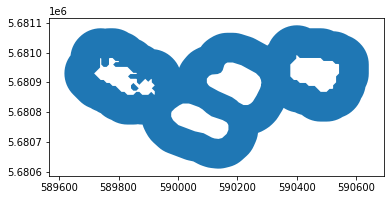

In [ ]:
# visualise to check
gdf_buffered.iloc[0:1].plot()

In [ ]:
# load our raster data
rio_clc = rio.open(os.path.join(root,'NL_CLC.tif'))
rio_wc = rio.open(os.path.join(root,'NL_ESA_WorldCover.tif'))
arr_clc = rio_clc.read(1)
arr_wc = rio_wc.read(1)

In [ ]:
# check the shape
arr_clc.shape, arr_wc.shape

((2441, 1872), (24405, 18709))

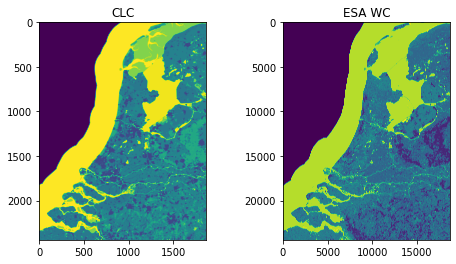

In [ ]:
# visualize (will colormap categorical data later)
fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].imshow(arr_clc)
axs[1].imshow(arr_wc)
axs[0].set_title('CLC')
axs[1].set_title('ESA WC')
plt.show()

In [ ]:
# upsample our CLC array so we don't lose pixels from areal coverage
arr_clc = arr_clc.repeat(10, 0).repeat(10, 1)
arr_clc.shape

(24410, 18720)

In [ ]:
# user RasterIO burn in our mask. Because of the slight difference in shapes well burn in two different masks using both rasters' georeferences.
mask_wc = rasterio.features.geometry_mask(
    geometries=gdf_buffered['buffer_geom'].tolist(), 
    out_shape=(arr_wc.shape[0], arr_wc.shape[1]), 
    transform=rio_wc.transform, 
    all_touched=False, 
    invert=True
)

In [ ]:
# slightly more complicated for CLC. Need to define a new transform using our new spatial scale.
clc_10m_transform = rasterio.Affine(10,0,rio_clc.transform[2],0,-10,rio_clc.transform[5])

mask_clc = rasterio.features.geometry_mask(
    geometries=gdf_buffered['buffer_geom'].tolist(), 
    out_shape=(arr_clc.shape[0], arr_clc.shape[1]), 
    transform=clc_10m_transform, 
    all_touched=False, 
    invert=True
)

In [ ]:
# use our mask to sample our two land cover arrays
lc_clc = arr_clc[mask_clc]
lc_wc = arr_wc[mask_wc]

In [ ]:
# check shapes
lc_clc.shape, lc_wc.shape

((83182,), (83182,))

In [ ]:
np.unique(lc_clc)

array([112, 121, 122, 123, 132, 133, 141, 142, 211, 231, 242, 243, 311,
       321, 322, 411, 421, 511, 512], dtype=int16)

In [ ]:
# we need to make a dictionary to compare the categorical values
landcover_categories = {
    'trees':{'wc':[10],'clc':[311,312,313],'color':'#006400'},
    'shrubland':{'wc':[20],'clc':[323,324],'color':'#ffbb22'},
    'grassland':{'wc':[30],'clc':[321,322],'color':'#ffff4c'},
    'cropland':{'wc':[40],'clc':[211,212,213,221,222,223,231,241,242,243,244],'color':'#f096ff'},
    'built-up':{'wc':[50],'clc':[111,112,121,122,123,124,131,132,133,141,142],'color':'#fa0000'},
    'barren':{'wc':[60],'clc':[331,332,334],'color':'#b4b4b4'},
    'snow_and_ice':{'wc':[70],'clc':[335],'color':'#f0f0f0'},
    'open_water':{'wc':[80],'clc':[511,512,521,522,523],'color':'#0064c8'},
    'herbaceous_wetland':{'wc':[90],'clc':[411,412,421,422,423],'color':'#0096a0'},
    'mangroves':{'wc':[95],'clc':[],'color':'#00cf75'},
    'moss_and_lichen':{'wc':[100],'clc':[444],'color':'#fae6a0'},
}

In [ ]:
# parse the results
results = {}
for lc_key,lc_dict in landcover_categories.items():
  results[lc_key] = {
      'wc':np.isin(lc_wc,lc_dict['wc']).sum(),
      'clc':np.isin(lc_clc, lc_dict['clc']).sum(),
  }

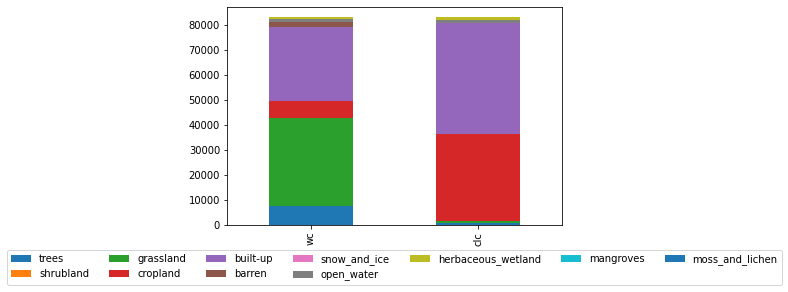

In [ ]:
# visualise the results
pd.DataFrame(results).plot.bar(stacked=True).legend(loc='lower center', ncol=7, bbox_to_anchor=(0.5,-0.3))

❓ How might we interrogate this further?

# Tutorial 4: Spatial Regression

Let's analyse the previous solar data to try to deduce why some places have been quicker to adopt solar PV than others! We will be following the flow diagram below, which is explained fully in Key Lesson 4.

To begin, we'll _spatially join_ our solar data to US states. A spatial join is a database operation for geospatial data which matches spatial data based on their intersecting geometries, i.e. it allows us to map each solar facility to the US state is resides in. We'll also sample some solar irradiation data to use as an independent variable. We'll then try to detect any spatial dependence in the amount of installed solar at the end of 2018.

Then, we'll proceed by analysing installed solar PV at the _county_ level, showing the dependence of scale. We will find that [xxx yyy zzz]

## 5.A State-Level

In [ ]:
# first load solar pv facility data
gdf = gpd.read_file(os.path.join(root,'solar_pv_predicted_set.geojson'))

In [ ]:
# load Natural Earth admin-level-1 data 
us_state_df =gpd.read_file(os.path.join(root,'ne_10m_admin_1.geojson'))

In [ ]:
# ...and filter for the United States
us_state_df = us_state_df.loc[us_state_df['iso_a2']=='US',['iso_3166_2','name','geometry']]

In [ ]:
# spatially join our solar pv data to the US states... we can use centroids to force uniqueness
gdf['centroid'] = gdf.geometry.centroid

gdf = gdf.set_geometry('centroid')

gdf = gpd.sjoin(gdf, us_state_df, how='left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
# drop non-US detections
gdf = gdf.loc[~gdf['iso_3166_2'].isna()]

In [ ]:
# aggregate our data at the state level, summing generating capacity
gdf_agg = gdf[['iso_3166_2','capacity_mw']].groupby('iso_3166_2').sum()

In [ ]:
# let's add count 
gdf_agg['facility_count'] = gdf[['iso_3166_2','name']].groupby('iso_3166_2').size()

In [ ]:
# now merge back on our us state dataframe
us_state_df = pd.merge(pd.DataFrame(us_state_df), gdf_agg, how='left', left_on='iso_3166_2',right_index=True).fillna(0)

In [ ]:
# and cast our dataframe back to a GeoDataFrame
us_state_gdf = gpd.GeoDataFrame(us_state_df, geometry='geometry',crs='epsg:4326')

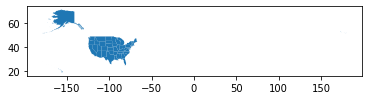

In [ ]:
us_state_gdf.plot()

In [ ]:
# load our econometric features and data munge

In [ ]:
county_df = pd.read_csv(os.path.join(root,'county_complete.csv'), delimiter='\t')

In [ ]:
mapper = us_state_df[['name','iso_3166_2']].set_index('name').to_dict()

In [ ]:
county_df['iso_3166_2'] = county_df['state'].map(mapper['iso_3166_2'])

In [ ]:
sum_columns = ['civilian_labor_force_2017','households_2019','pop_2019']
weight_mean_columns = ['some_college_2017', 'bachelors_2017',
       'veterans_2017', 'mean_work_travel_2017', 'broadband_2017',
       'computer_2017', 'metro_2013', 'poverty_2017', 'avg_family_size_2019',
       'hs_grad_2019', 'mean_household_income_2019', 'median_age_2019',
       'median_household_income_2019', 'per_capita_income_2019',
       'persons_per_household_2019', 'unemployment_rate_2019',
       'uninsured_2019', 'veterans_2019', 'white_2019', 'non_white_2019']
weight_column= 'pop_2019'

In [ ]:
state_socioecon_df = county_df[sum_columns+['iso_3166_2']].groupby('iso_3166_2').sum()

In [ ]:
state_socioecon_df = state_socioecon_df.join(
    county_df.groupby("iso_3166_2").apply(
        lambda dfx: (dfx[weight_mean_columns].multiply(dfx[weight_column],axis=0)).sum() / dfx[weight_column].sum()
        )
    )

In [ ]:
us_state_df = us_state_df.set_index('iso_3166_2').join(state_socioecon_df)

In [ ]:
# spatially sample solar irradiance

# load data
irradiance_ds = rio.open(os.path.join(root,'nrel_ghi.tif'))

In [ ]:
# make a helper function
def get_irradiance_mean(geom, ds):

  window = rasterio.features.geometry_window(
      dataset=ds, 
      shapes=[geom]
  )

  window_transform = rio.windows.transform(window=window, transform=ds.transform)

  mask = rasterio.features.geometry_mask(
      geometries=[geom],
      out_shape=(window.height, window.width), 
      transform=window_transform, 
      all_touched=False, 
      invert=True
  )

  arr = ds.read(1,window=window)

  # can take the mean directly because it is per m^2
  return arr[mask].mean()

In [ ]:
us_state_df['ghi'] = us_state_df['geometry'].apply(lambda geom: get_irradiance_mean(geom, irradiance_ds))

In [ ]:
us_state_gdf = gpd.GeoDataFrame(us_state_df,geometry='geometry', crs='epsg:4326')

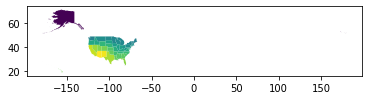

In [ ]:
# sanity check
us_state_gdf.plot(column='ghi')

In [ ]:
# get the spatial weights matrix - use Queen adjacency
from libpysal.weights import Queen

In [ ]:
w = Queen.from_dataframe(us_state_gdf)

/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 16, 33.
  warnings.warn(message)


In [ ]:
chosen_variables = ['pop_2019','per_capita_income_2019','metro_2013','ghi']

In [ ]:
Y = us_state_gdf[['capacity_mw']].values
X = us_state_gdf[chosen_variables].values

In [ ]:
# run spatial diagnostics
m1 = spreg.OLS(Y, X, w=w, spat_diag=True, name_x=chosen_variables, name_y='capacity_mw')

In [ ]:
print(m1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :ln(capacity_mw)                Number of Observations:          51
Mean dependent var  :   1061.6555                Number of Variables   :           5
S.D. dependent var  :   3034.3080                Degrees of Freedom    :          46
R-squared           :      0.5593
Adjusted R-squared  :      0.5210
Sum squared residual:202870434.059                F-statistic           :     14.5957
Sigma-square        : 4410226.827                Prob(F-statistic)     :   9.055e-08
S.E. of regression  :    2100.054                Log likelihood        :    -459.870
Sigma-square ML     : 3977851.648                Akaike info criterion :     929.741
S.E of regression ML:   1994.4552                Schwarz criterion     :     939.400

-------------------------------------------------------------------------

Neither the lag nor error LM are significant. We can use our OLS model as it is, but we'll want to find better explanatory variables to improve our R<sup>2</sup>.

## 5.B County-Level

In [ ]:
# first load solar pv facility data
gdf = gpd.read_file(os.path.join(root,'solar_pv_predicted_set.geojson'))

In [ ]:
# load us counties
counties_gdf = gpd.read_file(os.path.join(root,'us_counties.geojson'))

In [ ]:
# spatially join our solar pv data to the US states... we can use centroids to force uniqueness
gdf['centroid'] = gdf.geometry.centroid

gdf = gdf.set_geometry('centroid')

gdf = gpd.sjoin(gdf, counties_gdf[['FIPS','NAME','geometry']], how='left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
# drop non-US detections
gdf = gdf.loc[~gdf['FIPS'].isna()]

# aggregate our data at the state level, summing generating capacity
gdf_agg = gdf[['FIPS','capacity_mw']].groupby('FIPS').sum()

# let's add count 
gdf_agg['facility_count'] = gdf[['FIPS']].groupby('FIPS').size()

# now merge back on our us state dataframe
counties_gdf = pd.merge(pd.DataFrame(counties_gdf), gdf_agg, how='left', left_on='FIPS',right_index=True).fillna(0)

# and cast our dataframe back to a GeoDataFrame
counties_gdf = gpd.GeoDataFrame(counties_gdf, geometry='geometry',crs='epsg:4326')

In [ ]:
counties_gdf.columns

Index(['FID', 'OBJECTID', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS',
       'FIPS', 'POPULATION', 'POP_SQMI', 'POP2010', 'POP10_SQMI', 'WHITE',
       'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER',
       'MULT_RACE', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14',
       'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54',
       'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE',
       'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M',
       'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD',
       'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC',
       'RENTER_OCC', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'AVE_SALE12',
       'SQMI', 'NO_FARMS17', 'AVE_SIZE17', 'CROP_ACR17', 'AVE_SALE17',
       'SHAPE_Length', 'SHAPE_Area', 'geometry', 'capacity_mw',
       'facility_count'],
      dtype='object')

In [ ]:
county_df = pd.read_csv(os.path.join(root,'county_complete.csv'), delimiter='\t')

In [ ]:
counties_gdf['FIPS'] = counties_gdf.FIPS.astype(int)

In [ ]:
county_df = pd.merge(county_df, counties_gdf[['FIPS','geometry','capacity_mw','facility_count']],  how='left',left_on='fips',right_on='FIPS')

In [ ]:
# load data
irradiance_ds = rio.open(os.path.join(root,'nrel_ghi.tif'))

# make a helper function
def get_irradiance_mean(geom, ds):

  try:

    window = rasterio.features.geometry_window(
        dataset=ds, 
        shapes=[geom]
    )

    window_transform = rio.windows.transform(window=window, transform=ds.transform)

    mask = rasterio.features.geometry_mask(
        geometries=[geom],
        out_shape=(window.height, window.width), 
        transform=window_transform, 
        all_touched=False, 
        invert=True
    )

    arr = ds.read(1,window=window)

    # can take the mean directly because it is per m^2
    return arr[mask].mean()
  except:
    return np.nan

In [ ]:
county_df['ghi'] = county_df['geometry'].apply(lambda geom: get_irradiance_mean(geom, irradiance_ds))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice.


In [ ]:
county_df = county_df.loc[~county_df['ghi'].isna()] # drop na

In [ ]:
county_df = gpd.GeoDataFrame(county_df,geometry='geometry', crs='epsg:4326')

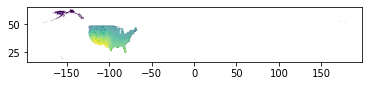

In [ ]:
county_df.plot(column='ghi')

In [ ]:
# get the spatial weights matrix - use Queen adjacency
from libpysal.weights import Queen

In [ ]:
w = Queen.from_dataframe(county_df)

/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))
/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 8 islands with ids: 68, 536, 537, 539, 1210, 1216, 1860, 2967.
  warnings.warn(message)


In [ ]:
chosen_variables = ['pop_2019','per_capita_income_2019','metro_2013','ghi']

In [ ]:
county_df = pd.merge(county_df, counties_gdf[['FIPS','capacity_mw','facility_count']],  how='left',left_on='fips',right_on='FIPS')

In [ ]:
Y = county_df[['capacity_mw']].values
X = county_df[chosen_variables].fillna(0).values

In [ ]:
# OLS while also running spatial diagnostics
m2 = spreg.OLS(Y, X, w=w, spat_diag=True, name_x=chosen_variables, name_y='capacity_mw')

In [ ]:
print (m2.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : capacity_mw                Number of Observations:        3129
Mean dependent var  :     17.3097                Number of Variables   :           5
S.D. dependent var  :    141.2624                Degrees of Freedom    :        3124
R-squared           :      0.1660
Adjusted R-squared  :      0.1650
Sum squared residual:52056260.189                F-statistic           :    155.4791
Sigma-square        :   16663.336                Prob(F-statistic)     :  1.805e-121
S.E. of regression  :     129.087                Log likelihood        :  -19645.808
Sigma-square ML     :   16636.708                Akaike info criterion :   39301.616
S.E of regression ML:    128.9834                Schwarz criterion     :   39331.859

-----------------------------------------------------------------------------

Okay! Lots to work with here. Let's specify the model further.

In [ ]:
for variable in chosen_variables:
  county_df['w_'+variable] = spreg.lag_spatial(w, county_df[variable].fillna(0).values)

In [ ]:
lagged_vars = ['w_'+variable for variable in chosen_variables]

In [ ]:
Y = county_df[['capacity_mw']].values
X = county_df[chosen_variables+lagged_vars].fillna(0).values

In [ ]:
# OLS while also running spatial diagnostics
m3 = spreg.OLS(Y, X, w=w, spat_diag=True, name_x=chosen_variables+lagged_vars, name_y='capacity_mw')

In [ ]:
print(m3.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : capacity_mw                Number of Observations:        3129
Mean dependent var  :     17.3097                Number of Variables   :           9
S.D. dependent var  :    141.2624                Degrees of Freedom    :        3120
R-squared           :      0.2473
Adjusted R-squared  :      0.2453
Sum squared residual:46984508.010                F-statistic           :    128.1195
Sigma-square        :   15059.137                Prob(F-statistic)     :  3.428e-186
S.E. of regression  :     122.716                Log likelihood        :  -19485.436
Sigma-square ML     :   15015.822                Akaike info criterion :   38988.871
S.E of regression ML:    122.5391                Schwarz criterion     :   39043.308

-----------------------------------------------------------------------------

In [ ]:
# add dummy variables for the state
county_df = pd.merge(county_df,pd.get_dummies(county_df['state']),how='left', left_index=True, right_index=True)

In [ ]:
biggest_states = county_df.groupby('state')['capacity_mw'].sum().sort_values(ascending=False).iloc[:20].index.tolist()

In [ ]:
Y = county_df[['capacity_mw']].values
X = county_df[chosen_variables+lagged_vars+biggest_states].fillna(0).values

In [ ]:
# OLS while also running spatial diagnostics
m4 = spreg.OLS(Y, X, w=w, spat_diag=True, name_x=chosen_variables+lagged_vars+biggest_states, name_y='capacity_mw')

In [ ]:
print (m4.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : capacity_mw                Number of Observations:        3129
Mean dependent var  :     17.3097                Number of Variables   :          29
S.D. dependent var  :    141.2624                Degrees of Freedom    :        3100
R-squared           :      0.2988
Adjusted R-squared  :      0.2925
Sum squared residual:43767945.516                F-statistic           :     47.1804
Sigma-square        :   14118.692                Prob(F-statistic)     :  8.714e-215
S.E. of regression  :     118.822                Log likelihood        :  -19374.487
Sigma-square ML     :   13987.838                Akaike info criterion :   38806.975
S.E of regression ML:    118.2702                Schwarz criterion     :   38982.380

-----------------------------------------------------------------------------

In [ ]:
w.transform = 'R'

('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 536, ' is an island (no neighbors)')
('WARNING: ', 537, ' is an island (no neighbors)')
('WARNING: ', 539, ' is an island (no neighbors)')
('WARNING: ', 1210, ' is an island (no neighbors)')
('WARNING: ', 1216, ' is an island (no neighbors)')
('WARNING: ', 1860, ' is an island (no neighbors)')
('WARNING: ', 2967, ' is an island (no neighbors)')


In [ ]:
m5 = spreg.GM_Lag(Y, X, w=w, spat_diag=True, name_x=chosen_variables+lagged_vars+biggest_states, name_y='capacity_mw')

In [ ]:
print (m5.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : capacity_mw                Number of Observations:        3129
Mean dependent var  :     17.3097                Number of Variables   :          30
S.D. dependent var  :    141.2624                Degrees of Freedom    :        3099
Pseudo R-squared    :      0.3695
Spatial Pseudo R-squared:  0.2923

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      35.2899003      34.2779059       1.0295232       0.3032339
            pop_2019       0.0000835       0.0000075      11.1690984       0.0000000
per_capita_income_2019      -0.0021694       0.0004274     

In [ ]:
mses = pd.Series({'OLS': mse(Y, m2.predy.flatten()),
                  'OLS+W':mse(Y, m3.predy.flatten()),
                  'OLS+W+fixed-eff': mse(Y, m4.predy.flatten()),
                  'Lag':mse(Y, m5.predy_e.flatten()),
                    })
mses.sort_values()

OLS+W+fixed-eff    13987.838132
Lag                14149.391826
OLS+W              15015.822311
OLS                16636.708274
dtype: float64